In [1]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
# /kaggle/input/test-set-self-driving-cars/driving_dataset/data.txt
# ../input/test-set-self-driving-cars/driving_dataset/0.jpg

In [2]:
import numpy as np
import cv2
from scipy import pi
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from math import pi, ceil

import tensorflow as tf
# from tensorflow.keras.xxx import xxx
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Lambda
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.initializers import TruncatedNormal, Constant
from keras import regularizers
from keras import optimizers
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau


Using TensorFlow backend.


In [4]:
# Image list (input)
steering_x = []

# Steering angle (output)
steering_y = []

# Defining the path to dataset 
image_dir = '../../../datasets/driving_dataset/'

In [5]:
# Reading the text file which contain image name and its corresponding steering angle

with open("../../../datasets/driving_dataset/data.txt") as file:
    for lines in file:
        X, y = lines.split()
        steering_x.append(image_dir + X) # appending the image_dir along with its name to list
        steering_y.append((float(y) * pi) / 180) # appending the steering angle after conversion to output list

In [6]:
# Printing the length of input and the output list
print(len(steering_x))
print(len(steering_y))

45406
45406


In [7]:
for i in range(1000,1010):
    print(steering_x[i], ',', steering_y[i])

../../../datasets/driving_dataset/1000.jpg , 2.4675464964695832
../../../datasets/driving_dataset/1001.jpg , 2.383072560673057
../../../datasets/driving_dataset/1002.jpg , 2.302089283380521
../../../datasets/driving_dataset/1003.jpg , 2.222851335339978
../../../datasets/driving_dataset/1004.jpg , 2.1190042448463156
../../../datasets/driving_dataset/1005.jpg , 2.0626301100068987
../../../datasets/driving_dataset/1006.jpg , 1.9992746581595042
../../../datasets/driving_dataset/1007.jpg , 1.9184659137921671
../../../datasets/driving_dataset/1008.jpg , 1.8427186242556128
../../../datasets/driving_dataset/1009.jpg , 1.722989037568802


In [8]:
with open("../../../datasets/driving_dataset/data.txt") as file:
    head = [next(file) for x in range(30)]
print(head)

['0.jpg 0.000000\n', '1.jpg 0.000000\n', '2.jpg 0.000000\n', '3.jpg 0.000000\n', '4.jpg 0.000000\n', '5.jpg 0.000000\n', '6.jpg 0.000000\n', '7.jpg 0.000000\n', '8.jpg 0.000000\n', '9.jpg 0.000000\n', '10.jpg 0.000000\n', '11.jpg 0.000000\n', '12.jpg 0.000000\n', '13.jpg 0.000000\n', '14.jpg 0.000000\n', '15.jpg 0.000000\n', '16.jpg 0.000000\n', '17.jpg 0.000000\n', '18.jpg 0.000000\n', '19.jpg 0.000000\n', '20.jpg 0.000000\n', '21.jpg 0.000000\n', '22.jpg 0.000000\n', '23.jpg 11.700000\n', '24.jpg 11.700000\n', '25.jpg 10.390000\n', '26.jpg 9.280000\n', '27.jpg 8.770000\n', '28.jpg 7.060000\n', '29.jpg 3.930000\n']


Steering angle 2.4675464964695832


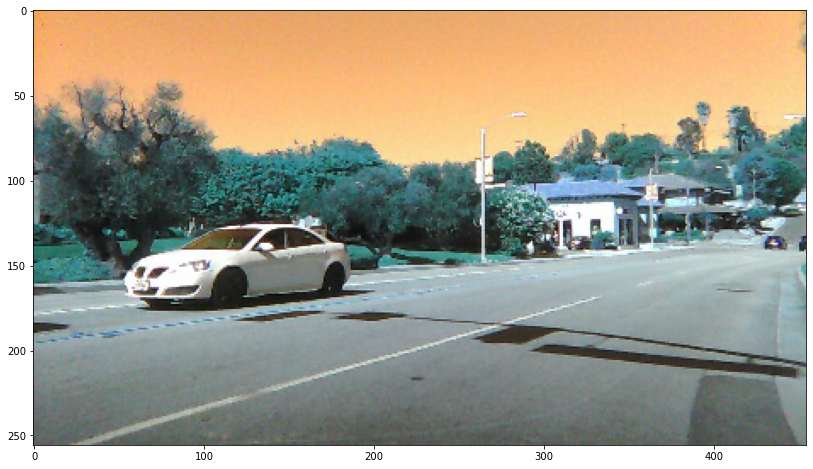

In [9]:
plt.figure(figsize =(16,8))
sample = cv2.imread('../../../datasets/driving_dataset/1000.jpg') 
plt.imshow(sample)
print("Steering angle", steering_y[1000])

In [10]:
# First 80% as train data
train_steering_x = steering_x[:int(len(steering_x) * 0.8)]
train_steering_y = steering_y[:int(len(steering_y) * 0.8)]

# Remaining 20% as test data
val_steering_x = steering_x[-int(len(steering_x) * 0.2):]
val_steering_y = steering_y[-int(len(steering_y) * 0.2):]

In [11]:
print(len(train_steering_x))
print(len(train_steering_y))

print(len(val_steering_x))
print(len(val_steering_y))

36324
36324
9081
9081


In [12]:
for i in range(5):
    print(train_steering_x[i], ',', train_steering_y[i], ' in train set')
    
for i in range(5):
    print(val_steering_x[i], ',', val_steering_y[i], ' in test set')

../../../datasets/driving_dataset/0.jpg , 0.0  in train set
../../../datasets/driving_dataset/1.jpg , 0.0  in train set
../../../datasets/driving_dataset/2.jpg , 0.0  in train set
../../../datasets/driving_dataset/3.jpg , 0.0  in train set
../../../datasets/driving_dataset/4.jpg , 0.0  in train set
../../../datasets/driving_dataset/36325.jpg , -0.18832102629018815  in test set
../../../datasets/driving_dataset/36326.jpg , -0.1759291886010284  in test set
../../../datasets/driving_dataset/36327.jpg , -0.16371188383706814  in test set
../../../datasets/driving_dataset/36328.jpg , -0.1319468914507713  in test set
../../../datasets/driving_dataset/36329.jpg , -0.1038470904936626  in test set


<AxesSubplot:ylabel='Count'>

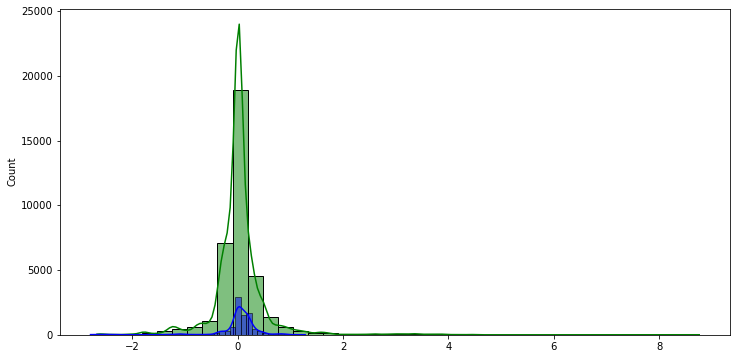

In [13]:
# plt.hist(Ytrain, bins=40, density=1, color='green', histtype ='step')
# plt.hist(Ytest, bins=40, density=1, color='blue', histtype ='step')
plt.figure(figsize=(12,6))
sns.histplot(data=train_steering_y, color='green', bins=40, kde=True)
sns.histplot(data=val_steering_y, color='blue', bins=40, kde=True)

In [14]:
# from sklearn.metrics import mean_squared_error

train_mean_steering_y = np.mean(train_steering_y)
# dummy_pred = []
# for i in range(len(Ytest)):
#     dummy_pred.append(train_mean_steering_y)
    
# mean_squared_error(Ytest, dummy_pred)

print('Train_Mean_Squared_Error(MEAN): ', np.mean(np.square(train_steering_y-train_mean_steering_y)) )
print('Test_Mean_Squared_Error(MEAN): ', np.mean(np.square(val_steering_y-train_mean_steering_y)) )
print('Train_Mean_Squared_Error(ZERO): ', np.mean(np.square(train_steering_y)-0.0))
print('Test_Mean_Squared_Error(ZERO): ', np.mean(np.square(val_steering_y)-0.0))

Train_Mean_Squared_Error(MEAN):  0.31619413226973125
Test_Mean_Squared_Error(MEAN):  0.19114218828169288
Train_Mean_Squared_Error(ZERO):  0.3173912144141886
Test_Mean_Squared_Error(ZERO):  0.1909079388457136


In [15]:
# model = Sequential()
# model.add(InputLayer(input_shape =(66, 200, 3)))
# model.add(Conv2D(filters = 24, kernel_size= 5, strides=(2, 2), kernel_regularizer=l2(),bias_regularizer=l2()))
# model.add(Conv2D(filters = 36, kernel_size= 5, strides=(2, 2), kernel_regularizer=l2(),bias_regularizer=l2()))
# model.add(Conv2D(filters = 48, kernel_size= 5, strides=(2, 2), kernel_regularizer=l2(),bias_regularizer=l2()))
# model.add(Conv2D(filters = 64, kernel_size= 3, strides=(1, 1), kernel_regularizer=l2(),bias_regularizer=l2()))
# model.add(Conv2D(filters = 64, kernel_size= 3, strides=(1, 1), kernel_regularizer=l2(),bias_regularizer=l2())) 
# model.add(BatchNormalization())

# model.add(Flatten())
# model.add(Dense(1152,activation = "relu", kernel_regularizer=l2(),bias_regularizer=l2()))
# model.add(Dropout(0.2))
# model.add(Dense(100,activation = "relu", kernel_regularizer=l2(),bias_regularizer=l2()))
# model.add(Dropout(0.15))
# model.add(Dense(50,activation = "relu", kernel_regularizer=l2(),bias_regularizer=l2()))
# model.add(Dropout(0.1))
# model.add(Dense(10,activation = "relu", kernel_regularizer=l2(),bias_regularizer=l2()))
# model.add(Dense(1,activation = "linear", kernel_regularizer=l2(),bias_regularizer=l2()))
  
# adam = tf.keras.optimizers.Adam(lr = 0.0001)

# model.compile(optimizer = adam , loss= "mse" , metrics = ["mse"])

# model.summary()

In [16]:
# dimensions of our images.
img_width, img_height = 66, 200
input_shape = (img_width, img_height, 3)

In [17]:
train_data_dir = "../../../datasets/driving_dataset/"
nb_train_samples = 36324
nb_validation_samples = 9081
epochs = 12
batch_size = 128

In [6]:
def atan_layer(x):
    return tf.multiply(tf.atan(x), 2)

In [19]:
# Model
model = Sequential()

# Conv Layer 1
model.add(Conv2D(24, (5, 5), strides=2, input_shape=input_shape,
          kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.1),
          bias_initializer=Constant(value=0.1),
          kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Conv Layer 2
model.add(Conv2D(36, (5, 5), strides=2, input_shape=input_shape,
          kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.1),
          bias_initializer=Constant(value=0.1),
          kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Conv Layer 3
model.add(Conv2D(48, (5, 5), strides=2, input_shape=input_shape,
          kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.1),
          bias_initializer=Constant(value=0.1),
          kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Conv Layer 4
model.add(Conv2D(64, (3, 3), input_shape=input_shape,
          kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.1),
          bias_initializer=Constant(value=0.1),
          kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Conv Layer 5
model.add(Conv2D(64, (3, 3), input_shape=input_shape,
          kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.1),
          bias_initializer=Constant(value=0.1),
          kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Flatten
model.add(Flatten())

# Fully Conected Layer 1
model.add(Dense(1164,
         kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.1),
         bias_initializer=Constant(value=0.1),
         kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Fully Conected Layer 2
model.add(Dense(100,
         kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.1),
         bias_initializer=Constant(value=0.1),
         kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Fully Conected Layer 3
model.add(Dense(50,
         kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.1),
         bias_initializer=Constant(value=0.1),
         kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(1,
         kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.1),
         bias_initializer=Constant(value=0.1),
         kernel_regularizer=regularizers.l2(0.001)))
model.add(Lambda(atan_layer))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
activation_1 (Activation)    (None, 31, 98, 24)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 98, 24)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 47, 36)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 47, 36)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)        

In [20]:
adam = optimizers.Adam(lr = 0.0001)
model.compile(loss='mse',
              optimizer=adam,
              metrics=['mse'])

In [28]:
def generate_arrays_from_file():
    gen_state = 0
    while 1:
        if gen_state + 128 > len(train_steering_x):
            gen_state = 0
        paths = train_steering_x[gen_state : gen_state + 128]
        y = train_steering_y[gen_state : gen_state + 128]
        X =  [np.float32(cv2.resize(cv2.imread(x, 1), (200, 66) )) / 255.0 for x in paths]
        gen_state = gen_state + 128
        yield np.array(X), np.array(y)

In [29]:
def get_validation_dataset():
    images= [np.float32(cv2.resize(cv2.imread(x, 1), (200, 66))) / 255.0 for x in val_steering_x]
    return np.array(images), np.array(val_steering_y)

In [30]:
train_generator = generate_arrays_from_file()

In [31]:
X,y = get_validation_dataset()

In [32]:
X.shape

(9081, 66, 200, 3)

In [33]:
checkpointer = ModelCheckpoint(filepath = 'model.h5',
                               monitor='val_loss', 
                               verbose=1, 
                               save_best_only=True, 
                               save_weights_only=False, 
                               mode='auto', 
                               period=1)

In [34]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, min_lr=0.000001)

In [35]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=(X,y),
    callbacks=[checkpointer,reduce_lr]
)

Epoch 1/12
283/283 [==============================] - 213s 752ms/step - loss: 13.8765 - mse: 1.7323 - val_loss: 12.1300 - val_mse: 0.2090

Epoch 00001: val_loss improved from inf to 12.13002, saving model to model.h5
Epoch 2/12
283/283 [==============================] - 205s 725ms/step - loss: 12.0383 - mse: 0.3948 - val_loss: 11.5421 - val_mse: 0.2015

Epoch 00002: val_loss improved from 12.13002 to 11.54208, saving model to model.h5
Epoch 3/12
283/283 [==============================] - 183s 646ms/step - loss: 11.3571 - mse: 0.3497 - val_loss: 10.8570 - val_mse: 0.1989

Epoch 00003: val_loss improved from 11.54208 to 10.85704, saving model to model.h5
Epoch 4/12
283/283 [==============================] - 186s 658ms/step - loss: 10.6297 - mse: 0.3367 - val_loss: 10.1148 - val_mse: 0.1973

Epoch 00004: val_loss improved from 10.85704 to 10.11478, saving model to model.h5
Epoch 5/12
283/283 [==============================] - 183s 646ms/step - loss: 9.8660 - mse: 0.3305 - val_loss: 9.3440

In [36]:
model.save_weights("weights.h5")

In [37]:
model.save("driving_model")

In [38]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_mse', 'loss', 'mse', 'lr'])

In [39]:
mse = history.history['mse']
val_mse = history.history['val_mse']
loss = history.history['loss']
val_loss = history.history['val_loss']

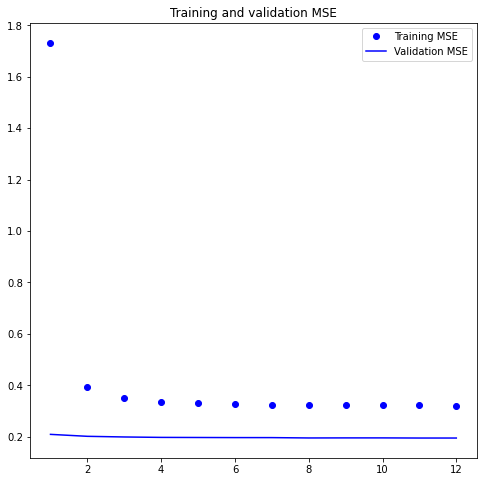

In [40]:
plt.figure(figsize = (8, 8))
epochs = range(1, len(mse) + 1)
plt.plot(epochs, mse, 'bo', label='Training MSE')
plt.plot(epochs, val_mse, 'b', label='Validation MSE')
plt.title('Training and validation MSE')
plt.legend()

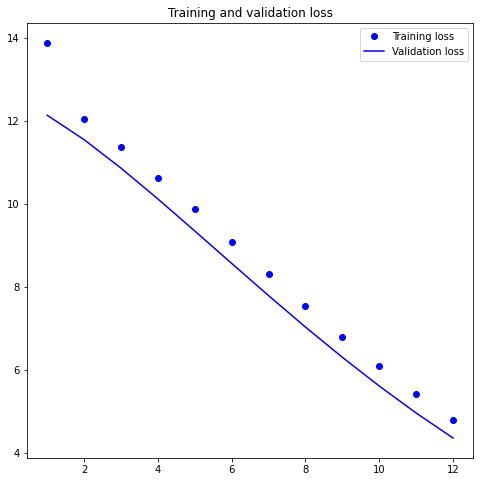

In [41]:
plt.figure(figsize = (8, 8))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
xx = tf.keras.models.load_model("driving_model")

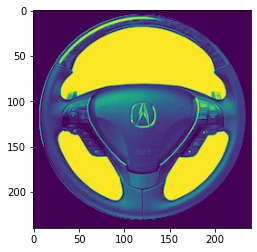

In [45]:
img_wheel = cv2.imread('./steering_wheel_image.jpg', 0)
plt.imshow(img_wheel)

In [46]:
row , col = img_wheel.shape

In [56]:
tf.autograph.experimental.do_not_convert(func=None)
i = 0
while cv2.waitKey(60) != ord("q"):
    image_path = X[i]
    image_array = cv2.imread(image_path)
    
    image_array_ = (cv2.resize(image_array[-150:],(200,66))/255.0).reshape((1,66,200,3))
    degrees = xx.predict(image_array_)[0][0]*180/pi
    
    #this function rotate the image by a given degrees.
    M = cv2.getRotationMatrix2D((col/2,row/2), -degrees, 1) 
    
     #warpAffine function applies rotation to the image
    dst = cv2.warpAffine(src = img_wheel, M = M, dsize = (col, row))
    cv2.imshow("Steering Wheel", dst)
    cv2.imshow("Frame Window",image_array)
    i += 1
cv2.destroyAllWindows()